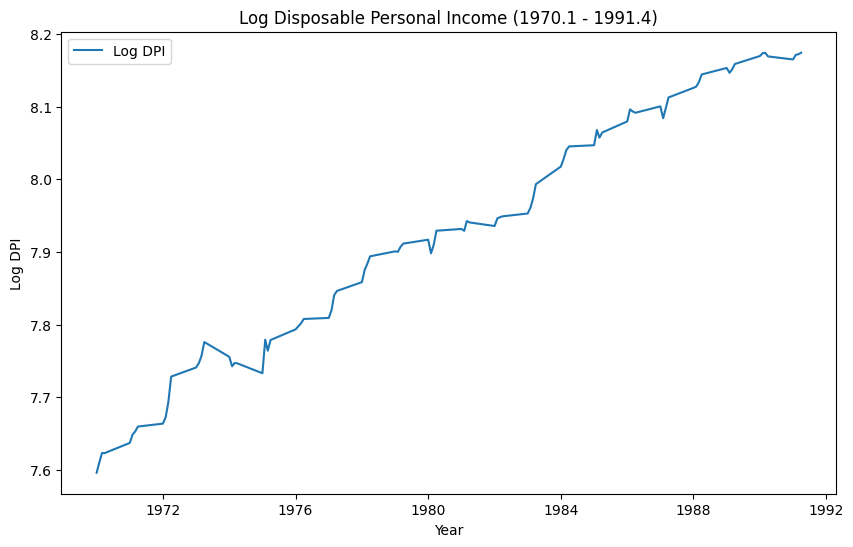

ADF Test on Log DPI:
ADF Statistic: -1.4407471034265025
p-value: 0.5625931773883976
Critical Values: {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
Fail to reject null hypothesis - Non-stationary



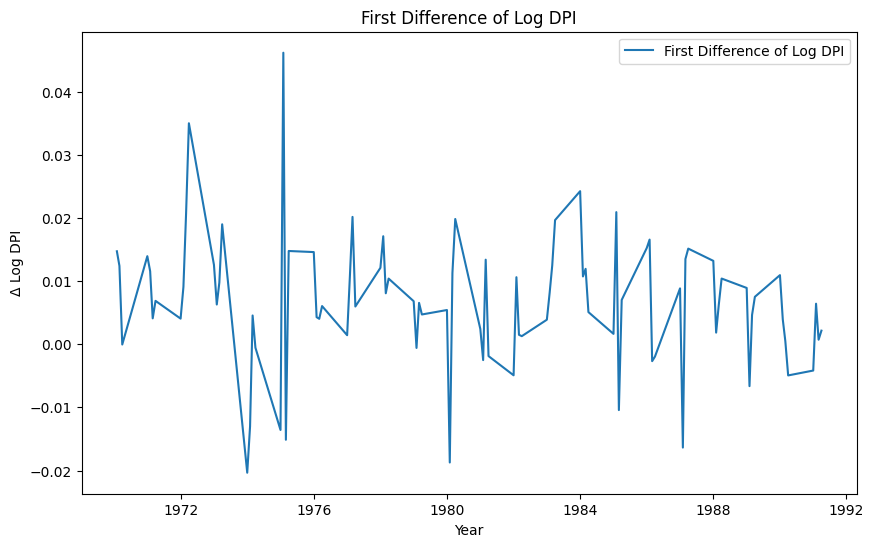

ADF Test on First Difference of Log DPI:
ADF Statistic: -4.66915965544451
p-value: 9.612498486181354e-05
Critical Values: {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
Reject null hypothesis - Stationary



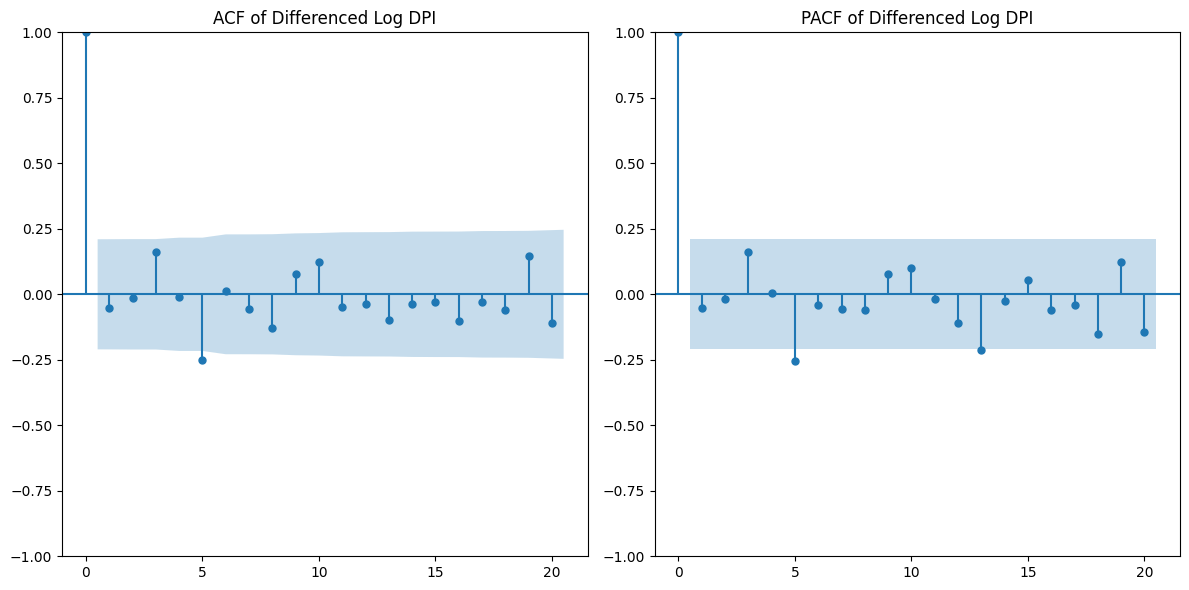

                               SARIMAX Results                                
Dep. Variable:                log_DPI   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 270.603
Date:                Fri, 14 Mar 2025   AIC                           -535.206
Time:                        18:03:22   BIC                           -527.808
Sample:                             0   HQIC                          -532.227
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.004    239.383      0.000       0.992       1.008
ma.L1         -0.9886      0.146     -6.768      0.000      -1.275      -0.702
sigma2         0.0001   1.94e-05      5.811      0.0

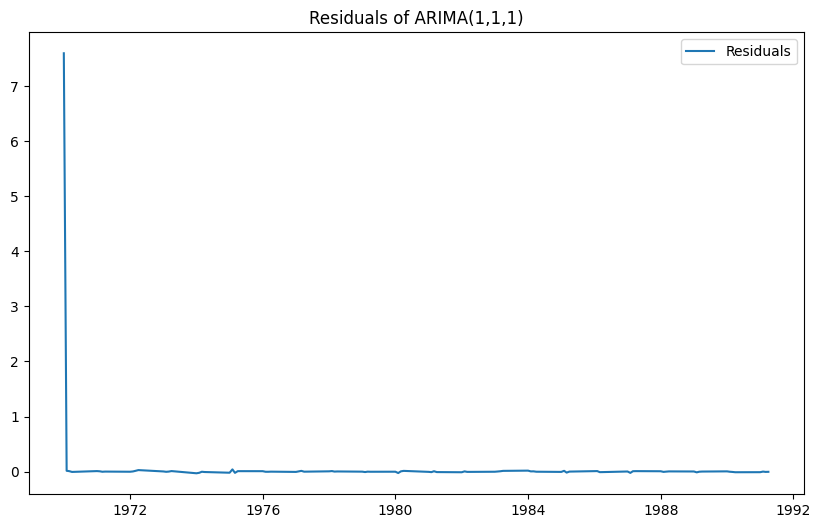

<Figure size 1000x600 with 0 Axes>

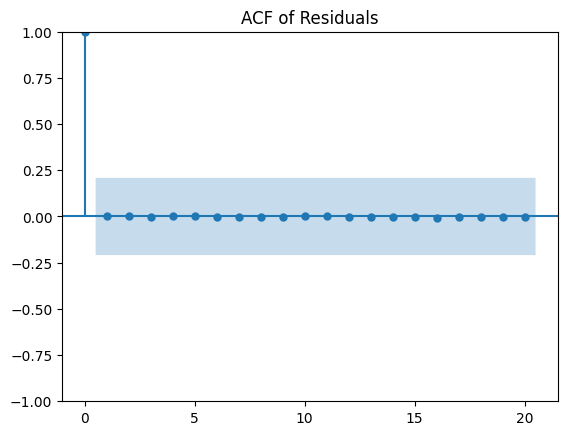

Ljung-Box Test:
     lb_stat  lb_pvalue
10  0.001026        1.0
ARIMA(1, 1, 0) - AIC: -517.832039663576, BIC: -512.9002234262668
ARIMA(0, 1, 1) - AIC: -516.3643916425159, BIC: -511.4325754052067
ARIMA(1, 1, 1) - AIC: -535.2060571817269, BIC: -527.8083328257632
ARIMA(2, 1, 0) - AIC: -520.2503828900956, BIC: -512.8526585341318
ARIMA(0, 1, 2) - AIC: -516.0013883479802, BIC: -508.60366399201644
                               SARIMAX Results                                
Dep. Variable:                log_DPI   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 270.603
Date:                Fri, 14 Mar 2025   AIC                           -535.206
Time:                        18:03:27   BIC                           -527.808
Sample:                             0   HQIC                          -532.227
                                 - 88                                         
Covariance Type:                  opg                

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# Hardcode Table 21.1 data
data = {
    'YEAR': [f"{year}.{quarter}" for year in range(1970, 1992) for quarter in range(1, 5)],
    'PDI': [
        1990.6, 2020.1, 2045.3, 2045.2, 2073.9, 2098.0, 2106.6, 2121.1, 2129.7, 2149.1,
        2193.9, 2272.0, 2300.7, 2315.2, 2337.9, 2382.7, 2334.7, 2304.5, 2315.0, 2313.7,
        2282.5, 2390.3, 2354.4, 2389.4, 2424.5, 2434.9, 2444.7, 2459.5, 2463.0, 2490.3,
        2541.0, 2556.2, 2587.3, 2631.9, 2653.2, 2680.9, 2699.2, 2697.6, 2715.3, 2728.1,
        2742.9, 2692.0, 2722.5, 2777.0, 2783.7, 2776.7, 2814.1, 2808.8, 2795.0, 2824.8,
        2829.0, 2832.6, 2843.6, 2867.0, 2903.0, 2960.6, 3033.2, 3065.9, 3102.7, 3118.5,
        3123.6, 3189.6, 3156.5, 3178.7, 3227.5, 3281.4, 3272.6, 3266.2, 3295.2, 3241.7,
        3285.7, 3335.8, 3380.1, 3386.3, 3407.5, 3443.1, 3473.9, 3450.9, 3466.9, 3493.0,
        3531.4, 3545.3, 3547.0, 3529.5, 3514.8, 3537.4, 3539.9, 3547.5
    ]
}
df = pd.DataFrame(data)

# Convert YEAR to datetime (quarterly format)
df['YEAR'] = pd.to_datetime(df['YEAR'].str.replace('.', 'Q'), format='%YQ%m')
df.set_index('YEAR', inplace=True)

# Compute log DPI
df['log_DPI'] = np.log(df['PDI'])

# Step 1: Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df['log_DPI'], label='Log DPI')
plt.title('Log Disposable Personal Income (1970.1 - 1991.4)')
plt.xlabel('Year')
plt.ylabel('Log DPI')
plt.legend()
plt.show()

# Step 2: Test stationarity (ADF test)
def adf_test(series, title=''):
    result = adfuller(series.dropna())
    print(f'ADF Test on {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] <= 0.05:
        print("Reject null hypothesis - Stationary")
    else:
        print("Fail to reject null hypothesis - Non-stationary")
    print()

adf_test(df['log_DPI'], 'Log DPI')

# Step 3: Difference the series
df['diff_log_DPI'] = df['log_DPI'].diff()
plt.figure(figsize=(10, 6))
plt.plot(df['diff_log_DPI'], label='First Difference of Log DPI')
plt.title('First Difference of Log DPI')
plt.xlabel('Year')
plt.ylabel('Δ Log DPI')
plt.legend()
plt.show()

# Test stationarity of differenced series
adf_test(df['diff_log_DPI'], 'First Difference of Log DPI')

# Step 4: ACF and PACF for model identification
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['diff_log_DPI'].dropna(), ax=plt.gca(), lags=20)
plt.title('ACF of Differenced Log DPI')
plt.subplot(122)
plot_pacf(df['diff_log_DPI'].dropna(), ax=plt.gca(), lags=20)
plt.title('PACF of Differenced Log DPI')
plt.tight_layout()
plt.show()

# Step 5: Fit ARIMA model (example: ARIMA(1,1,1))
model = ARIMA(df['log_DPI'], order=(1, 1, 1))
results = model.fit()
print(results.summary())

# Step 6: Diagnostics
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA(1,1,1)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test:")
print(lb_test)

# Step 7: Model selection (try different orders)
orders = [(1,1,0), (0,1,1), (1,1,1), (2,1,0), (0,1,2)]
for order in orders:
    model = ARIMA(df['log_DPI'], order=order)
    results = model.fit()
    print(f'ARIMA{order} - AIC: {results.aic}, BIC: {results.bic}')

# Final model (example: lowest AIC)
final_model = ARIMA(df['log_DPI'], order=(1,1,1))
final_results = final_model.fit()
print(final_results.summary())

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")